# George Russell

<img src="https://www.formula1.com/content/fom-website/en/drivers/george-russell/_jcr_content/image.img.1920.medium.jpg/1646750994602.jpg" width="300">

### Team: Mercedes

<img src ="https://www.formula1.com/content/fom-website/en/drivers/george-russell/_jcr_content/helmet.img.png/1646824823304.png" width="200">


In [1]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
source("source/prediction.r")
set.seed(620)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

Warning message:
“package ‘tidyr’ was built under R version 4.1.2”
Warning message:
“package ‘readr’ was built under R version 4.1.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'tune':
  method                   from   
  required_pkgs.model_spec parsnip

── Attaching packages ────────────────────────────────────── tidymodels 0.1.3 ──

✔ broom        0.7.12     ✔ rsample      0.1.1 
✔ dials        0.1.0      ✔ tune         0.1.6 
✔ infer        1.0.0      ✔ workflows    0.2.4 
✔ modeldata    0.1.1      ✔ workflowsets 0.1.0 
✔ parsnip      0.1.7      ✔ yardstick    0.0.9 
✔ recipes      0.1.17     

Warning message

In [2]:
initialize_master()

Rows: 79 Columns: 9

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): circuitRef, name, location, country, alt, url
dbl (3): circuitId, lat, lng


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 12716 Columns: 7

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): positionText
dbl (6): constructorStandingsId, raceId, constructorId, points, position, wins


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 11950 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): status
dbl (4): constructorResultsId, raceId, constructorId, points


ℹ Use `spec()` to retrieve the full column specification for this

In [3]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

# Filtering Lap Data For Individual Driver

rus_laps <- lap_data %>%
            filter(driverId == 847)

# Season Analysis

In [4]:
rmse_col <- data.frame(.metric = character(), .estimator = character(), .estimate = double(), Round = double(), stringsAsFactors=FALSE) 

racetime_col <- data.frame(race_time_milliseconds = double(), race_time_mins = double(), race_time_hrs = double()) 

rmse_col

racetime_col

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>


raceId,n
<dbl>,<int>
1011,56
1045,56
1052,55


`geom_smooth()` using formula 'y ~ x'



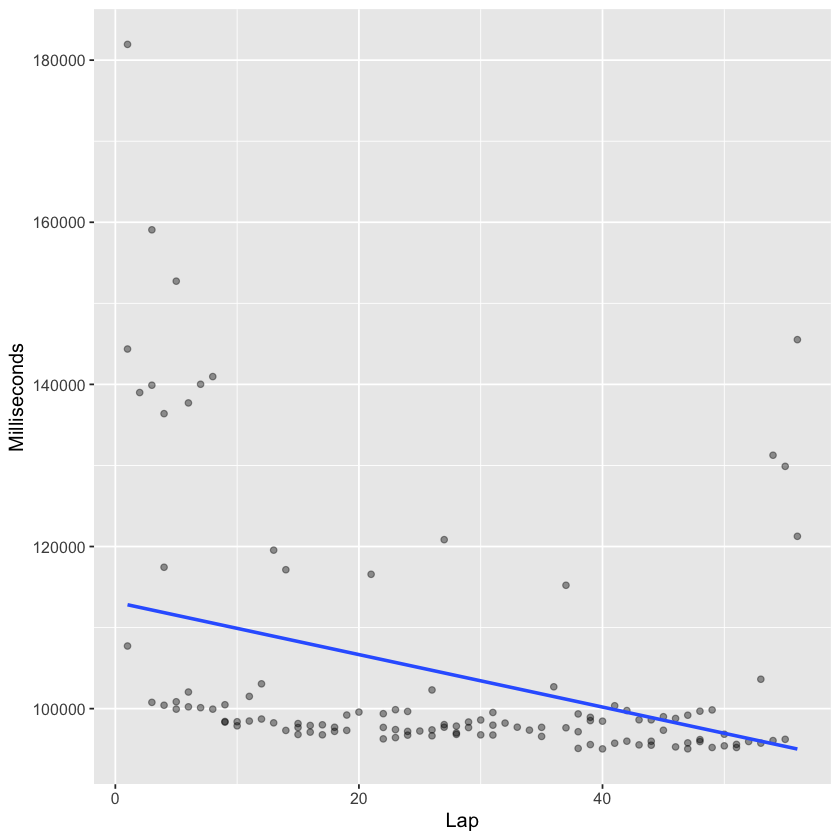

In [5]:
set.seed(2022)

#1. BAHRAIN 

gr_bahrain <- rus_laps %>%
                filter(raceId %in% bahrain_race_ID) 

gr_bahrain_clean <- gr_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
gr_bahrain_clean
gr_bahrain_clean_ID <- gr_bahrain_clean %>%
                        pull(raceId)


### SPLITTING DATA

gr_bahrain_races <- rus_laps %>%
                    filter(raceId %in% gr_bahrain_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(gr_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 1

initiate_rmse() 

### GETS PREDICTION

get_bahrain_prediction()

raceId,n
<dbl>,<int>
1042,65
1054,65


`geom_smooth()` using formula 'y ~ x'



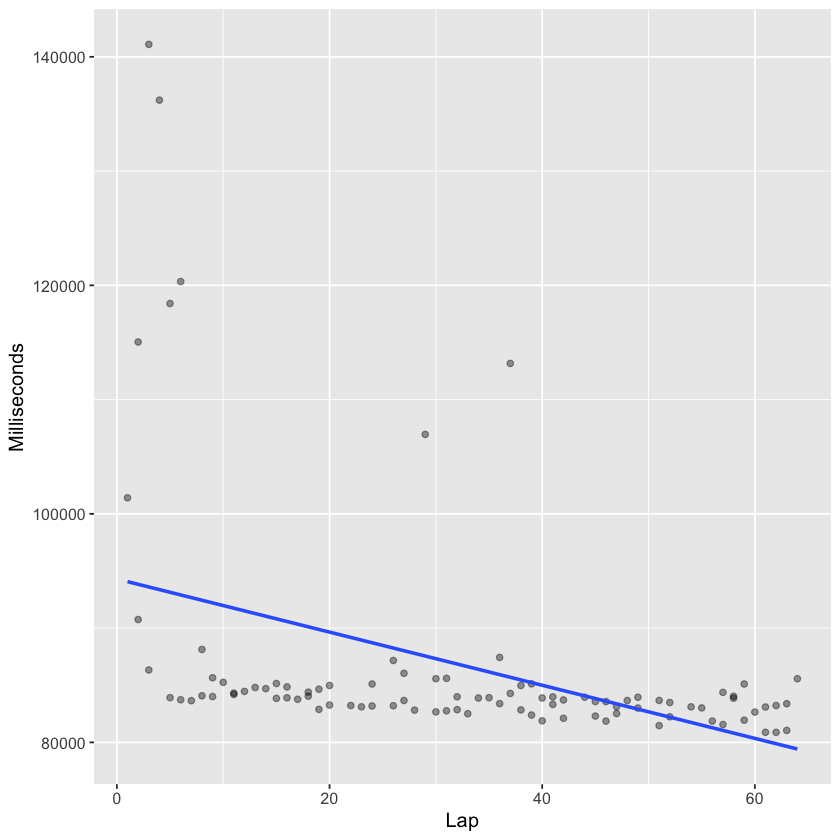

In [6]:
set.seed(2022)

#2. Portimão

gr_Portimão <- rus_laps %>%
                filter(raceId %in% Portimão_race_ID) 

gr_Portimão_grean <- gr_Portimão %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
gr_Portimão_grean
gr_Portimão_grean_ID <- gr_Portimão_grean %>%
                        pull(raceId)


### SPLITTING DATA

gr_Portimão_races <- rus_laps %>%
                    filter(raceId %in% gr_Portimão_grean_ID)

formulaone_split <- initial_split(gr_Portimão_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 2

initiate_rmse() 

### GETS PREDICTION

get_Portimão_prediction()

raceId,n
<dbl>,<int>
1010,56


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



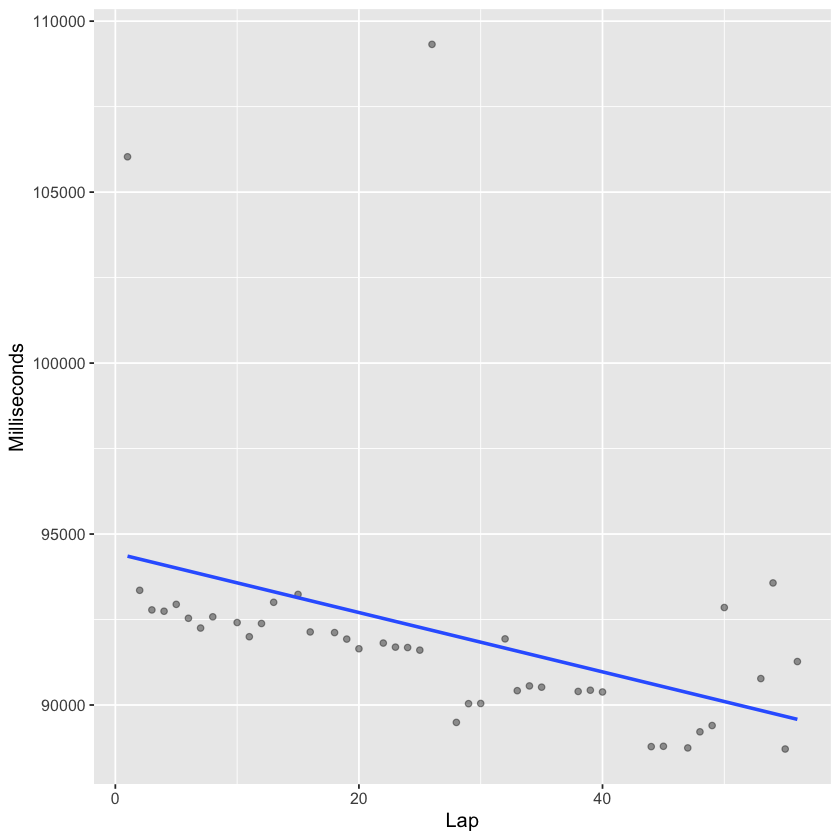

In [7]:
set.seed(2022)

#3. Australia

gr_aus <- rus_laps %>%
                filter(raceId %in% aus_race_ID) 

gr_aus_clean <- gr_aus %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
gr_aus_clean
gr_aus_clean_ID <- gr_aus_clean %>%
                        pull(raceId)


### SPLITTING DATA

gr_aus_races <- rus_laps %>%
                    filter(raceId %in% gr_aus_clean_ID)

formulaone_split <- initial_split(gr_aus_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 3

initiate_rmse() 

### GETS PREDICTION

get_australia_prediction()

raceId,n
<dbl>,<int>
1043,51
1053,30


`geom_smooth()` using formula 'y ~ x'



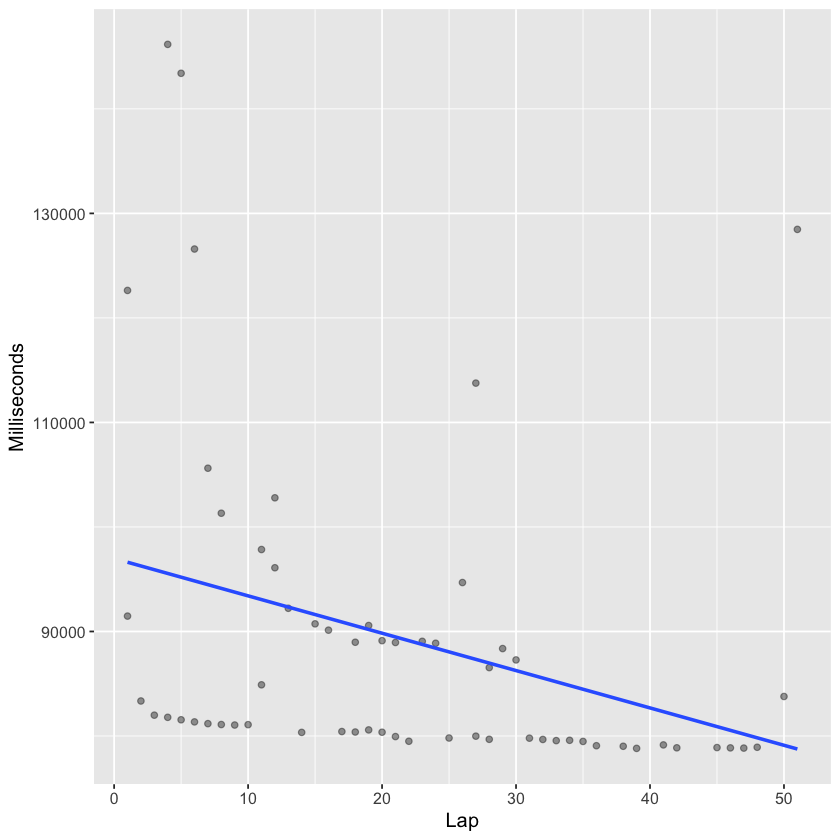

In [8]:
set.seed(2022)

#4. Italy, Imola

gr_imola <- rus_laps %>%
                filter(raceId %in% imola_race_ID) 

gr_imola_clean <- gr_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
gr_imola_clean
gr_imola_clean_ID <- gr_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

gr_imola_races <- rus_laps %>%
                    filter(raceId %in% gr_imola_clean_ID)

formulaone_split <- initial_split(gr_imola_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 4

initiate_rmse() 

### GETS PREDICTION

get_imola_prediction()

raceId,n
<dbl>,<int>
1044,57
1067,57


`geom_smooth()` using formula 'y ~ x'



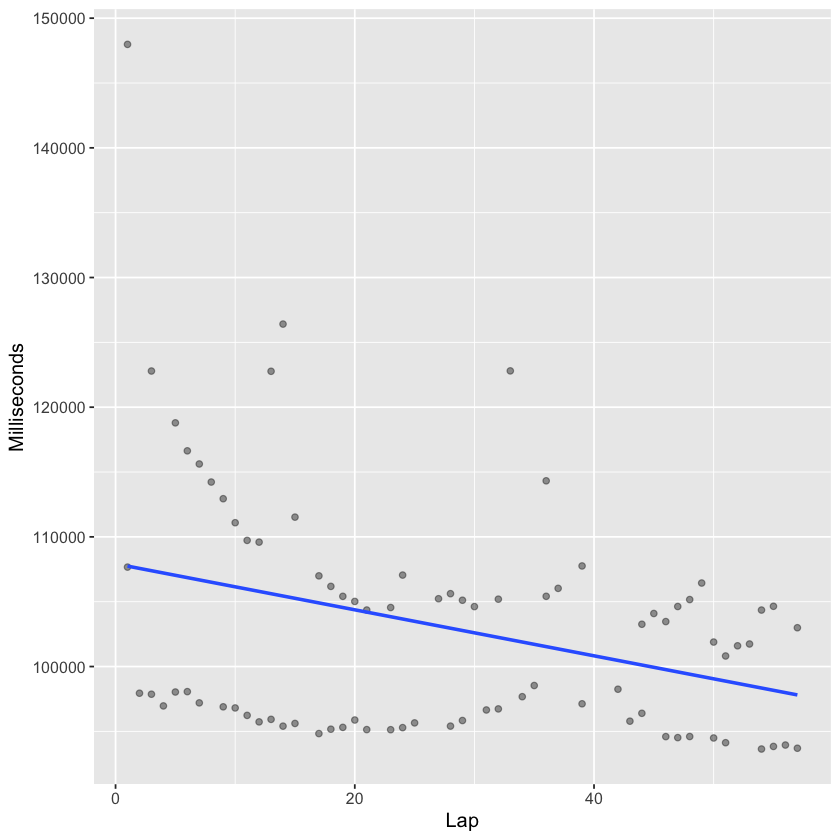

In [9]:
set.seed(2022)

#5. Turkey (Replacing Miami)

gr_turkey <- rus_laps %>%
                filter(raceId %in% turkey_race_ID) 

gr_turkey_clean <- gr_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
gr_turkey_clean
gr_turkey_clean_ID <- gr_turkey_clean %>%
                        pull(raceId)


### SPLITTING DATA

gr_turkey_races <- rus_laps %>%
                    filter(raceId %in% gr_turkey_clean_ID)

formulaone_split <- initial_split(gr_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 5

initiate_rmse() 

### GETS PREDICTION

get_miami_prediction()

raceId,n
<dbl>,<int>
1014,65
1036,65
1055,65


`geom_smooth()` using formula 'y ~ x'



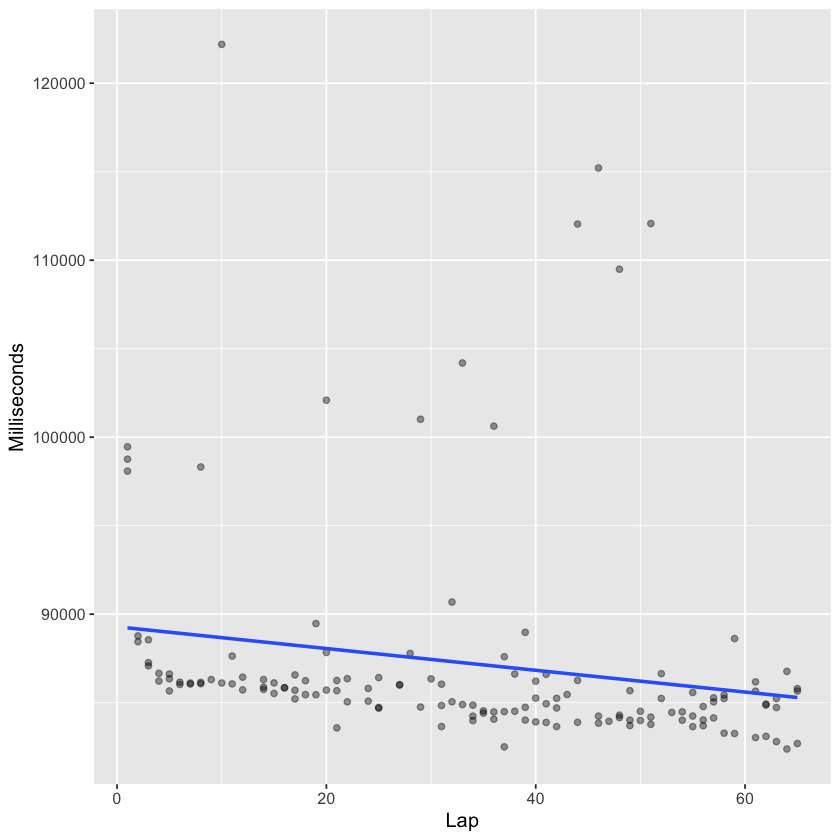

In [10]:
set.seed(2022)

#6. Spain

gr_spain <- rus_laps %>%
                filter(raceId %in% spain_race_ID) 

gr_spain_clean <- gr_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
gr_spain_clean
gr_spain_clean_ID <- gr_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

gr_spain_races <- rus_laps %>%
                    filter(raceId %in% gr_spain_clean_ID)

formulaone_split <- initial_split(gr_spain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 6

initiate_rmse() 

### GETS PREDICTION

get_spain_prediction()

raceId,n
<dbl>,<int>
1015,77
1056,77


`geom_smooth()` using formula 'y ~ x'



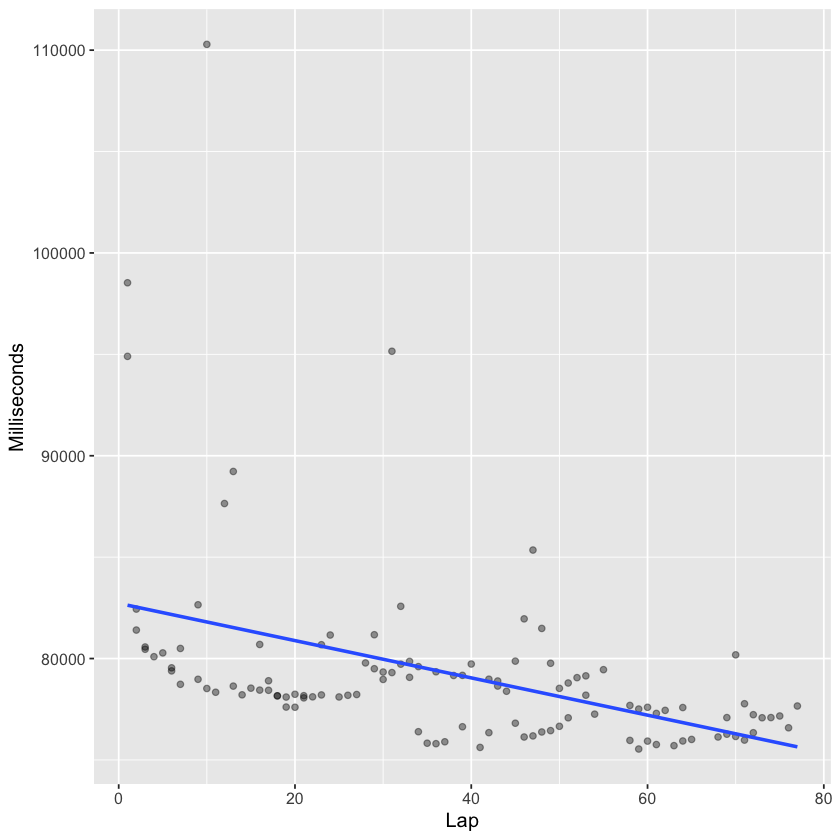

In [11]:
set.seed(2022)

#7.   Monaco

gr_monaco <- rus_laps %>%
                filter(raceId %in% monaco_race_ID) 

gr_monaco_clean <- gr_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
gr_monaco_clean
gr_monaco_clean_ID <- gr_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

gr_monaco_races <- rus_laps %>%
                    filter(raceId %in% gr_monaco_clean_ID)

formulaone_split <- initial_split(gr_monaco_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 7

initiate_rmse() 

### GETS PREDICTION

get_monaco_prediction()

raceId,n
<dbl>,<int>
1013,49
1057,48


`geom_smooth()` using formula 'y ~ x'



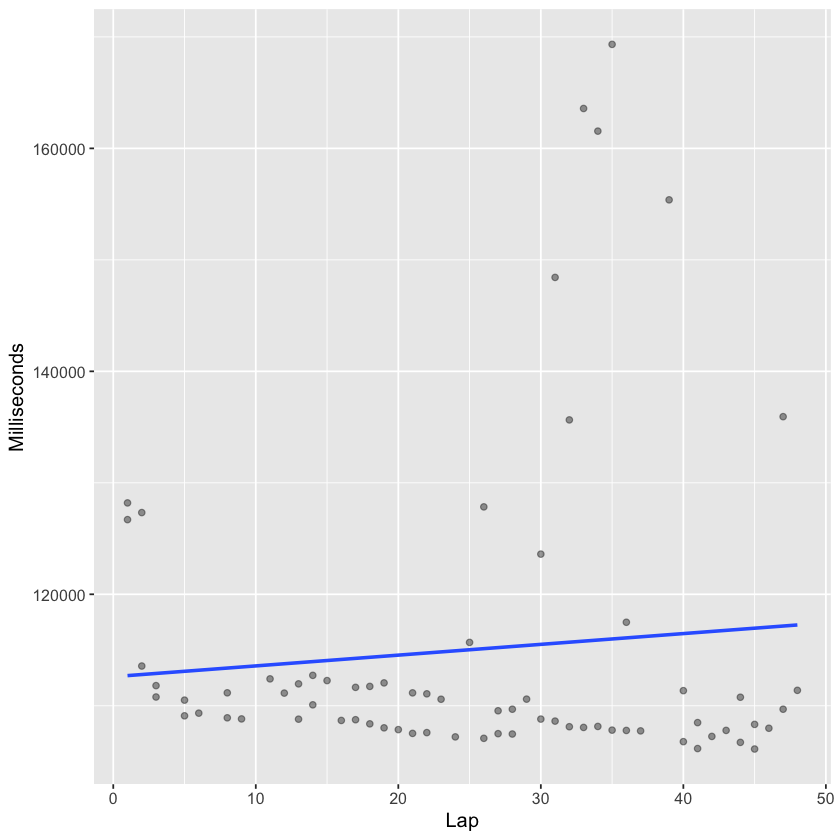

In [12]:
set.seed(2022)

#8.  Azerbaijan

gr_azerbaijan <- rus_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

gr_azerbaijan_clean <- gr_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
gr_azerbaijan_clean
gr_azerbaijan_clean_ID <- gr_azerbaijan_clean %>%
                        pull(raceId)


### SPLITTING DATA

gr_azerbaijan_races <- rus_laps %>%
                    filter(raceId %in% gr_azerbaijan_clean_ID)

formulaone_split <- initial_split(gr_azerbaijan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 8

initiate_rmse() 

### GETS PREDICTION

get_azerbaijan_prediction()

raceId,n
<dbl>,<int>
1016,68


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



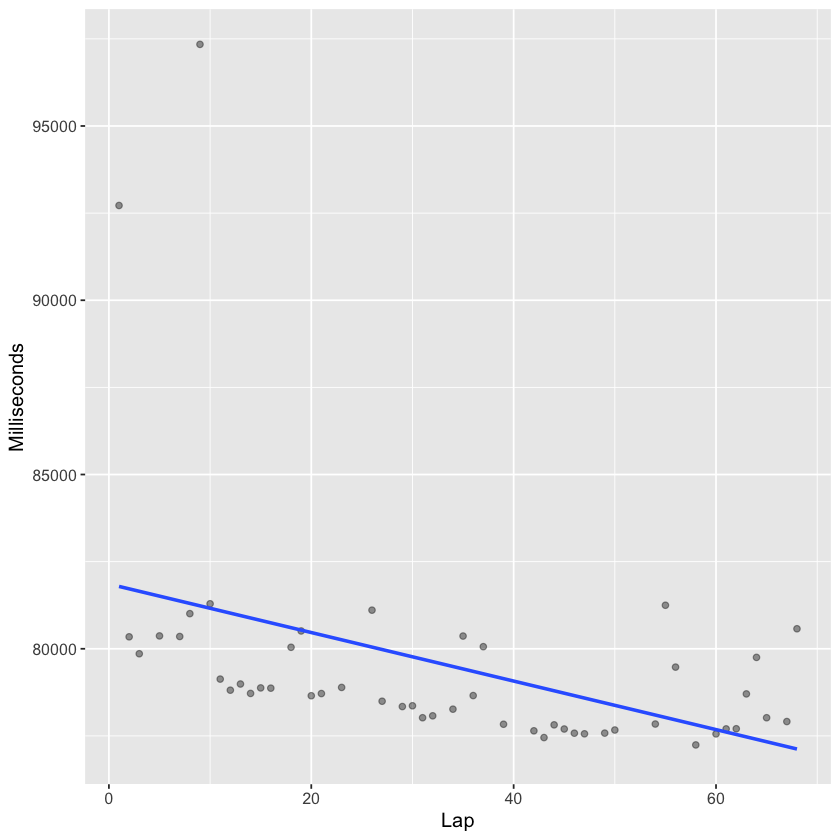

In [13]:
set.seed(2022)

#9.  Canada

gr_canada <- rus_laps %>%
                filter(raceId %in% canada_race_ID) 

gr_canada_clean <- gr_canada %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
gr_canada_clean
gr_canada_clean_ID <- gr_canada_clean %>%
                        pull(raceId)


### SPLITTING DATA

gr_canada_races <- rus_laps %>%
                    filter(raceId %in% gr_canada_clean_ID)

formulaone_split <- initial_split(gr_canada_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 9

initiate_rmse() 

### GETS PREDICTION

get_canada_prediction()

`geom_smooth()` using formula 'y ~ x'



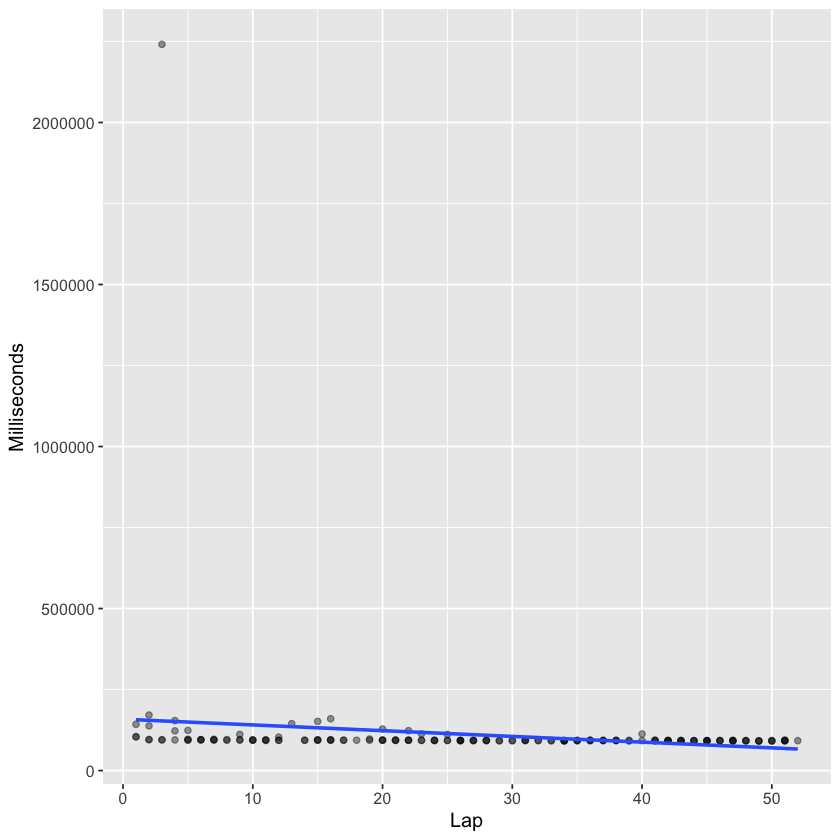

In [14]:
set.seed(2022)

#10.  Great Britain

gr_uk <- rus_laps %>%
                filter(raceId %in% uk_race_ID) 

gr_uk_clean <- gr_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

gr_uk_clean_ID <- gr_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

gr_uk_races <- rus_laps %>%
                    filter(raceId %in% gr_uk_clean_ID) 

formulaone_split <- initial_split(gr_uk_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 10

initiate_rmse() 

### GETS PREDICTION

get_uk_prediction()

`geom_smooth()` using formula 'y ~ x'



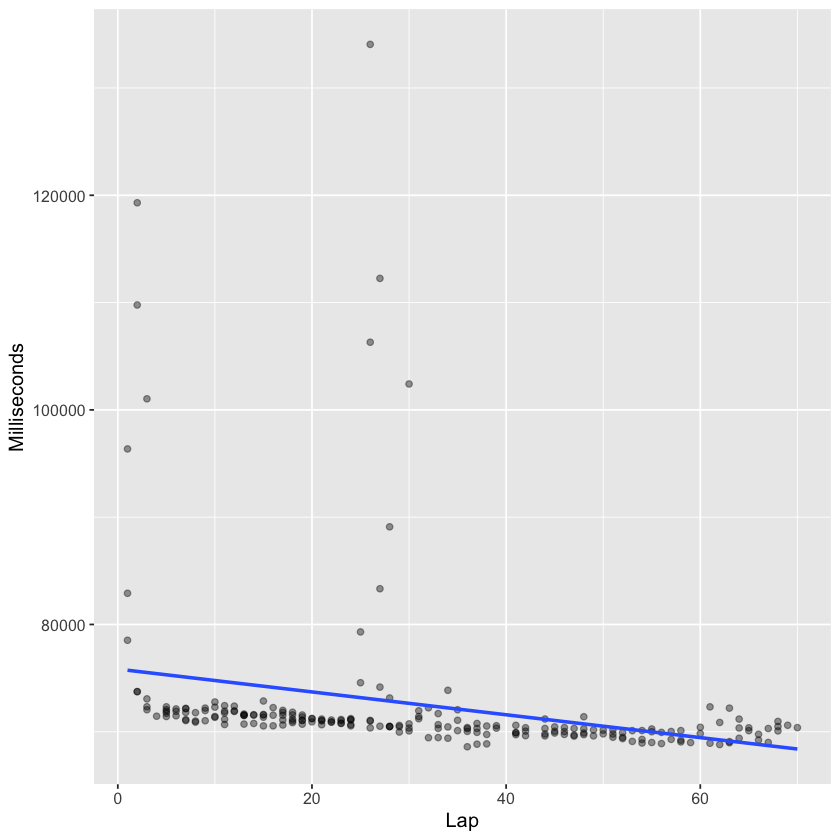

In [15]:
set.seed(2022)

#11.  Austria

gr_austria <- rus_laps %>%
                filter(raceId %in% austria_race_ID) 

gr_austria_clean <- gr_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

gr_austria_clean_ID <- gr_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

gr_austria_races <- rus_laps %>%
                    filter(raceId %in% gr_austria_clean_ID) 

formulaone_split <- initial_split(gr_austria_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 11

initiate_rmse() 

### GETS PREDICTION

get_austria_prediction()

raceId,n
<dbl>,<int>
1059,52
1017,51


`geom_smooth()` using formula 'y ~ x'



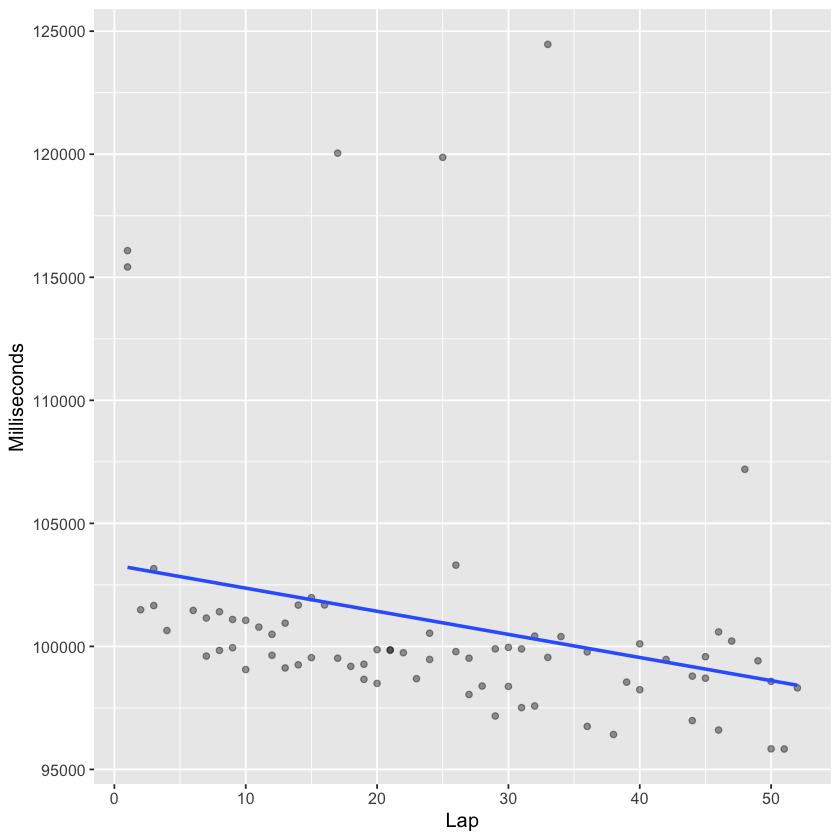

In [16]:
set.seed(2022)

#12.  France

gr_france <- rus_laps %>%
                filter(raceId %in% france_race_ID) 

gr_france_clean <- gr_france %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
gr_france_clean
gr_france_clean_ID <- gr_france_clean %>%
                        pull(raceId)


### SPLITTING DATA

gr_france_races <- rus_laps %>%
                    filter(raceId %in% gr_france_clean_ID)

formulaone_split <- initial_split(gr_france_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 12

initiate_rmse() 

### GETS PREDICTION

get_france_prediction()

`geom_smooth()` using formula 'y ~ x'



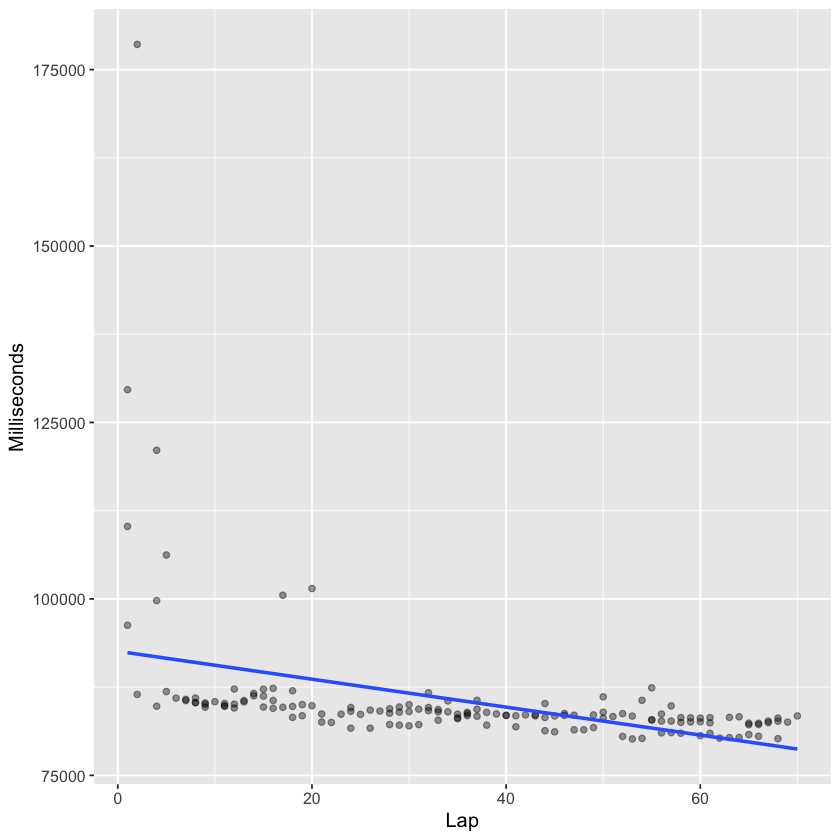

In [17]:
set.seed(2022)

#13.  Hungary

gr_hungary <- rus_laps %>%
                filter(raceId %in% hungary_race_ID) 

gr_hungary_clean <- gr_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
                     

gr_hungary_clean_ID <- gr_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

gr_hungary_races <- rus_laps %>%
                    filter(raceId %in% gr_hungary_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(gr_hungary_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 13

initiate_rmse() 

### GETS PREDICTION

get_hungary_prediction()

raceId,n
<dbl>,<int>
1022,43
1037,9
1063,1


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



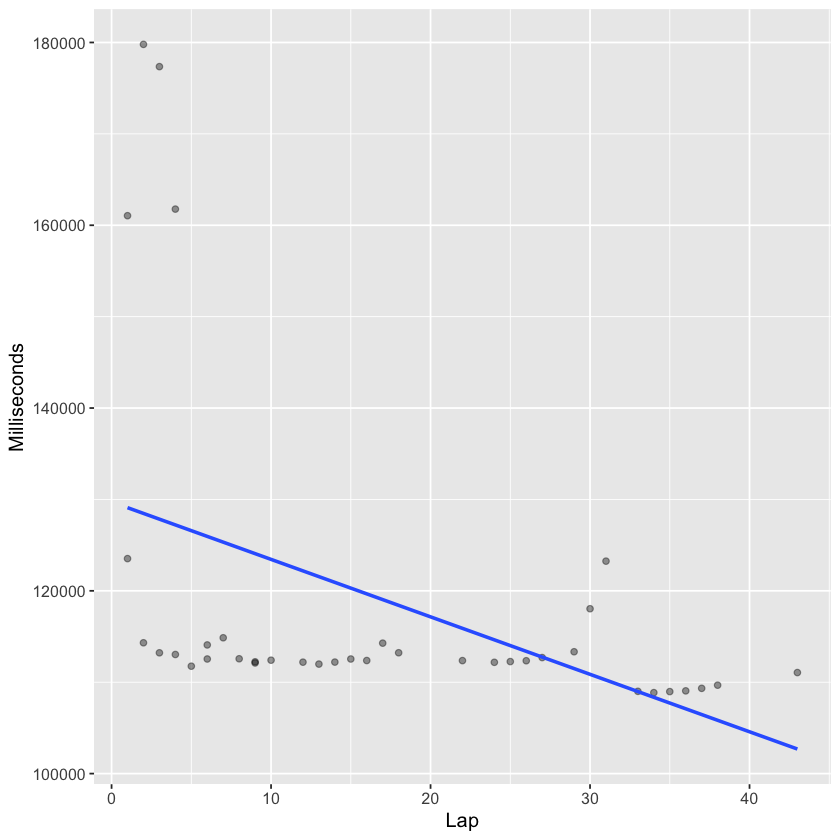

In [18]:
set.seed(2022)

#14. Belgium

gr_belgium <- rus_laps %>%
                filter(raceId %in% belgium_race_ID) 

gr_belgium_clean <- gr_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
gr_belgium_clean
gr_belgium_clean_ID <- gr_belgium_clean %>%
                        pull(raceId)


### SPLITTING DATA

gr_belgium_races <- rus_laps %>%
                    filter(raceId %in% gr_belgium_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(gr_belgium_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 14

initiate_rmse() 

### GETS PREDICTION

get_belgium_prediction()

raceId,n
<dbl>,<int>
1064,69


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



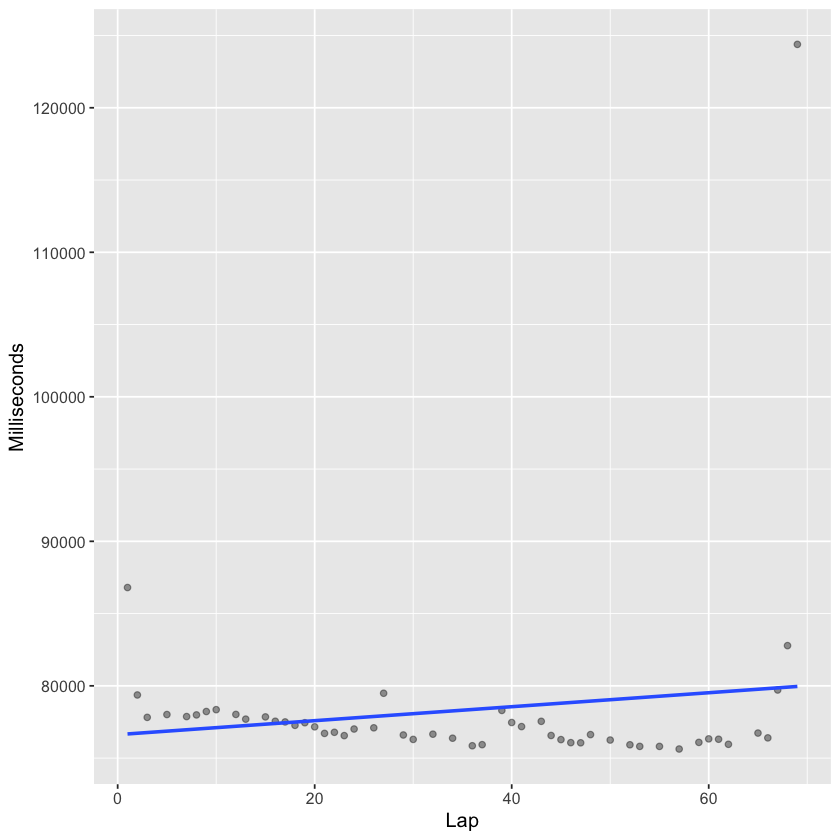

In [19]:
set.seed(2022)

#15.  Netherlands

gr_netherlands <- rus_laps %>%
                filter(raceId %in% netherlands_race_ID) 

gr_netherlands_clean <- gr_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
gr_netherlands_clean
gr_netherlands_clean_ID <- gr_netherlands_clean %>%
                        pull(raceId)


### SPLITTING DATA

gr_netherlands_races <- rus_laps %>%
                    filter(raceId %in% gr_netherlands_clean_ID)

formulaone_split <- initial_split(gr_netherlands_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 15

initiate_rmse() 

### GETS PREDICTION

get_netherlands_prediction()

raceId,n
<dbl>,<int>
1038,53
1065,53
1023,52


`geom_smooth()` using formula 'y ~ x'



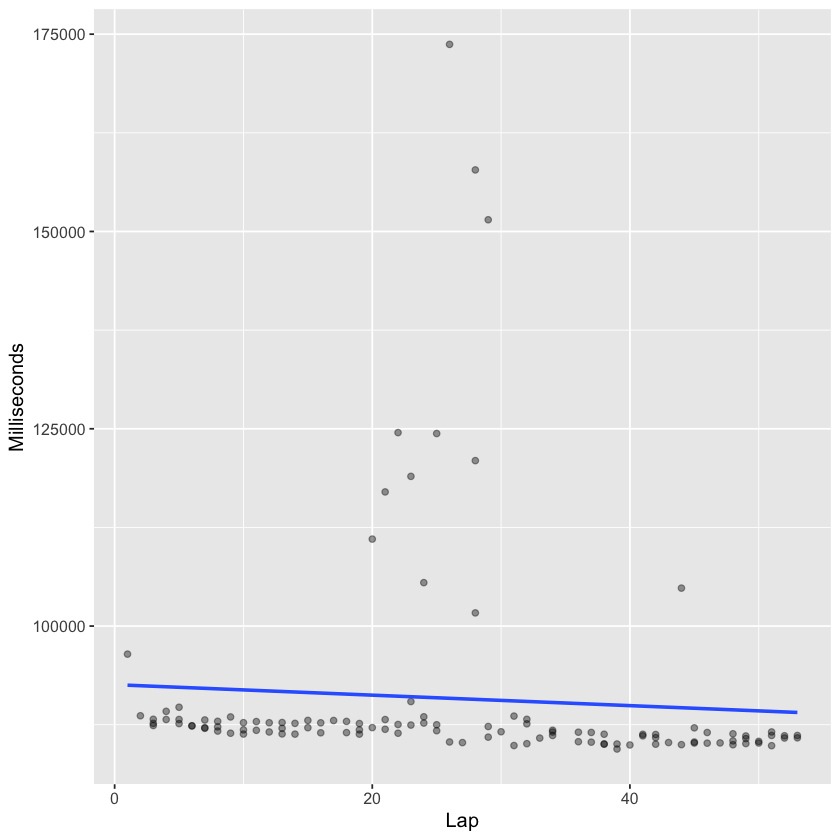

In [20]:
set.seed(2022)

#16.  Italy, Monza

gr_monza <- rus_laps %>%
                filter(raceId %in% monza_race_ID) 

gr_monza_clean <- gr_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
gr_monza_clean
gr_monza_clean_ID <- gr_monza_clean %>%
                        pull(raceId)


### SPLITTING DATA

gr_monza_races <- rus_laps %>%
                    filter(raceId %in% gr_monza_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(gr_monza_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 16

initiate_rmse() 

### GETS PREDICTION

get_monza_prediction()

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 1 breaks instead.”
Warning message:
“Too little data to stratify.
* Resampling will be unstratified.”
`geom_smooth()` using formula 'y ~ x'



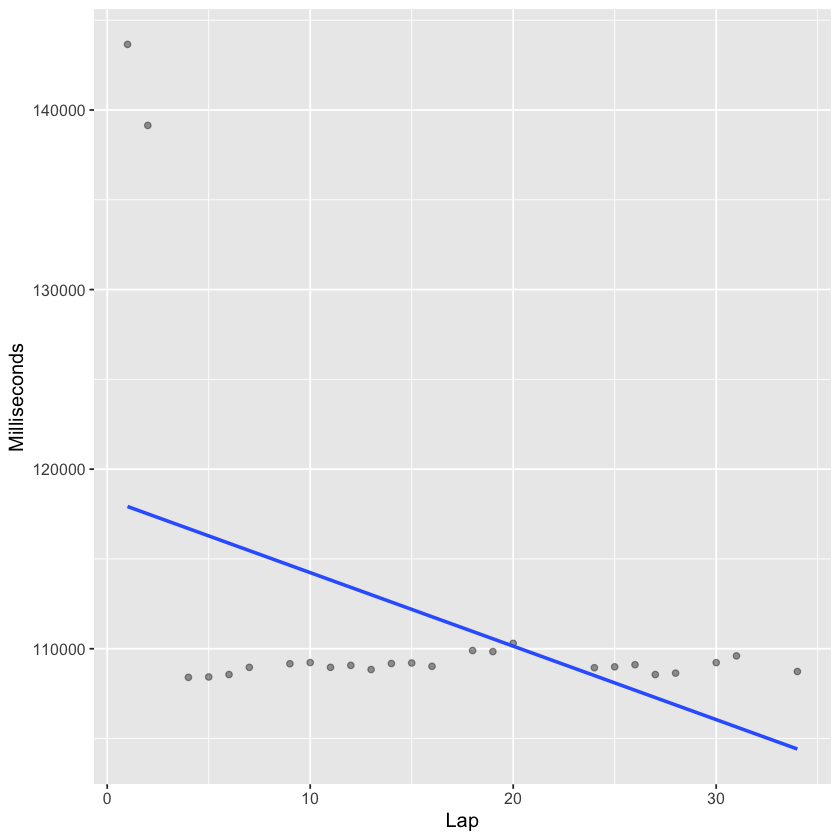

In [21]:
set.seed(2022)

#17.  Singapore

gr_singapore <- rus_laps %>%
                filter(raceId %in% singapore_race_ID) 

gr_singapore_clean <- gr_singapore %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

gr_singapore_clean_ID <- gr_singapore_clean %>%
                        pull(raceId)


### SPLITTING DATA

gr_singapore_races <- rus_laps %>%
                    filter(raceId %in% gr_singapore_clean_ID) 

formulaone_split <- initial_split(gr_singapore_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 17

initiate_rmse() 

### GETS PREDICTION

get_singapore_prediction()

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



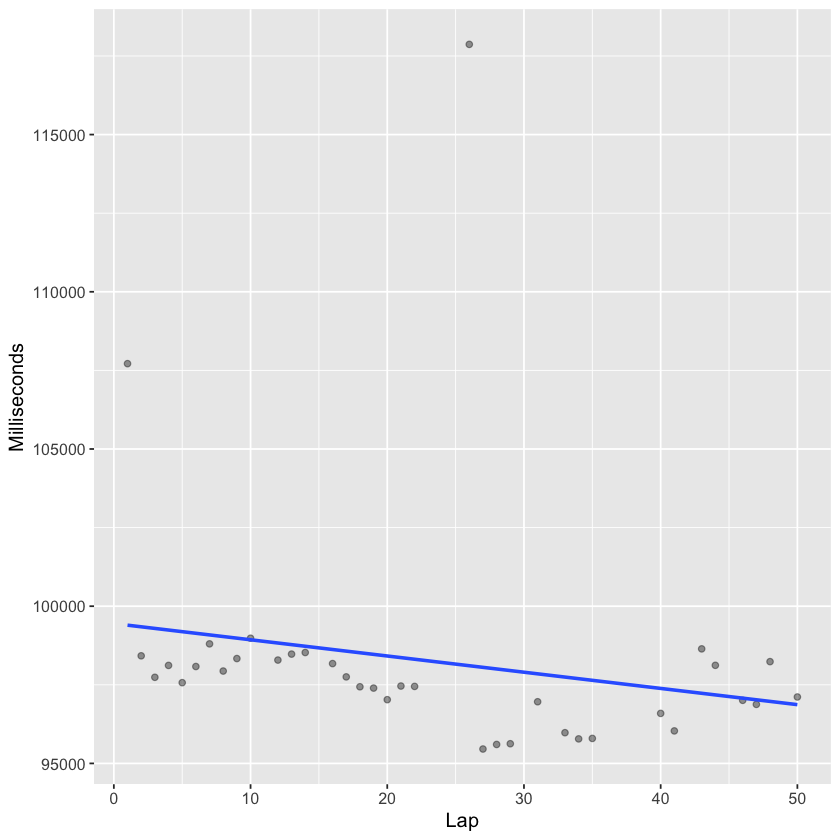

In [22]:
set.seed(2022)

#18.  Japan

gr_japan <- rus_laps %>%
                filter(raceId %in% japan_race_ID) 

gr_japan_clean <- gr_japan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
gr_japan_clean_ID <- gr_japan_clean %>%
                        pull(raceId)


### SPLITTING DATA

gr_japan_races <- rus_laps %>%
                    filter(raceId %in% gr_japan_clean_ID) 

formulaone_split <- initial_split(gr_japan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 18

initiate_rmse() 

### GETS PREDICTION

get_japan_prediction()

`geom_smooth()` using formula 'y ~ x'



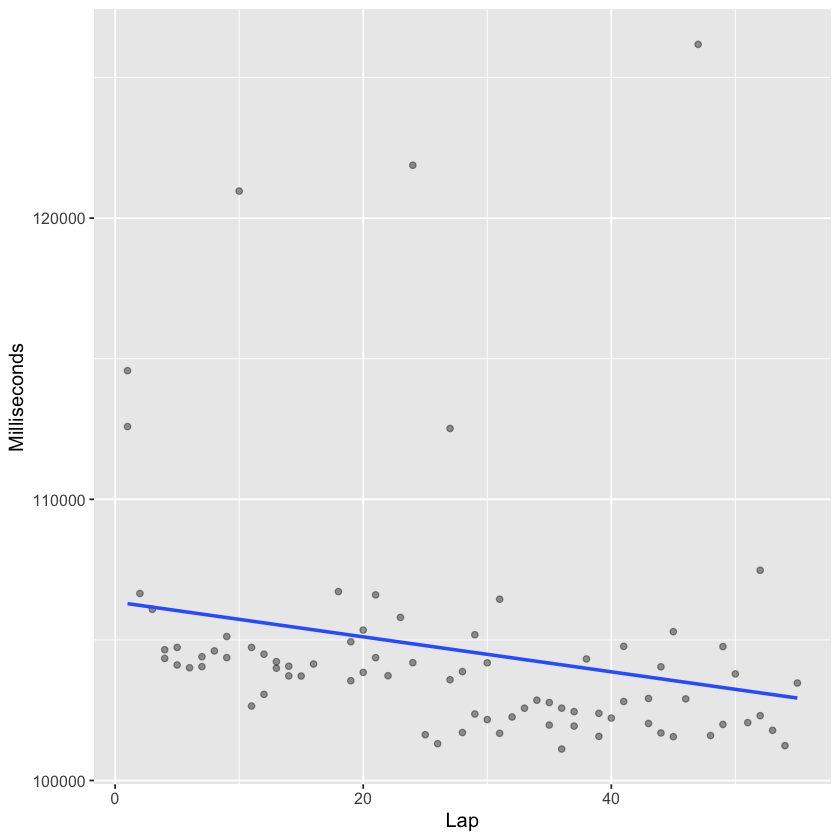

In [23]:
set.seed(2022)

#19.  USA, Austin

gr_austin <- rus_laps %>%
                filter(raceId %in% austin_race_ID) 

gr_austin_clean <- gr_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

gr_austin_clean_ID <- gr_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

gr_austin_races <- rus_laps %>%
                    filter(raceId %in% gr_austin_clean_ID)

formulaone_split <- initial_split(gr_austin_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 19

initiate_rmse() 

### GETS PREDICTION

get_austin_prediction()

`geom_smooth()` using formula 'y ~ x'



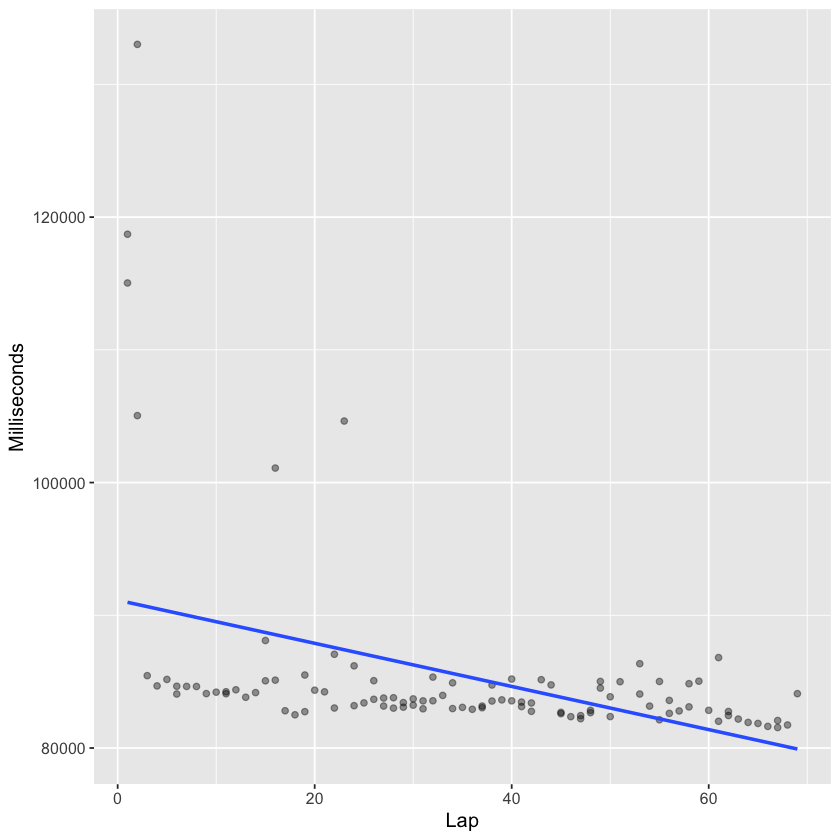

In [24]:
set.seed(2022)

#20. Mexico

gr_mexico <- rus_laps %>%
                filter(raceId %in% mexico_race_ID) 

gr_mexico_clean <- gr_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

gr_mexico_clean_ID <- gr_mexico_clean %>%
                        pull(raceId)


### SPLITTING DATA

gr_mexico_races <- rus_laps %>%
                    filter(raceId %in% gr_mexico_clean_ID)

formulaone_split <- initial_split(gr_mexico_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 20

initiate_rmse() 

### GETS PREDICTION

get_mexico_prediction()

`geom_smooth()` using formula 'y ~ x'



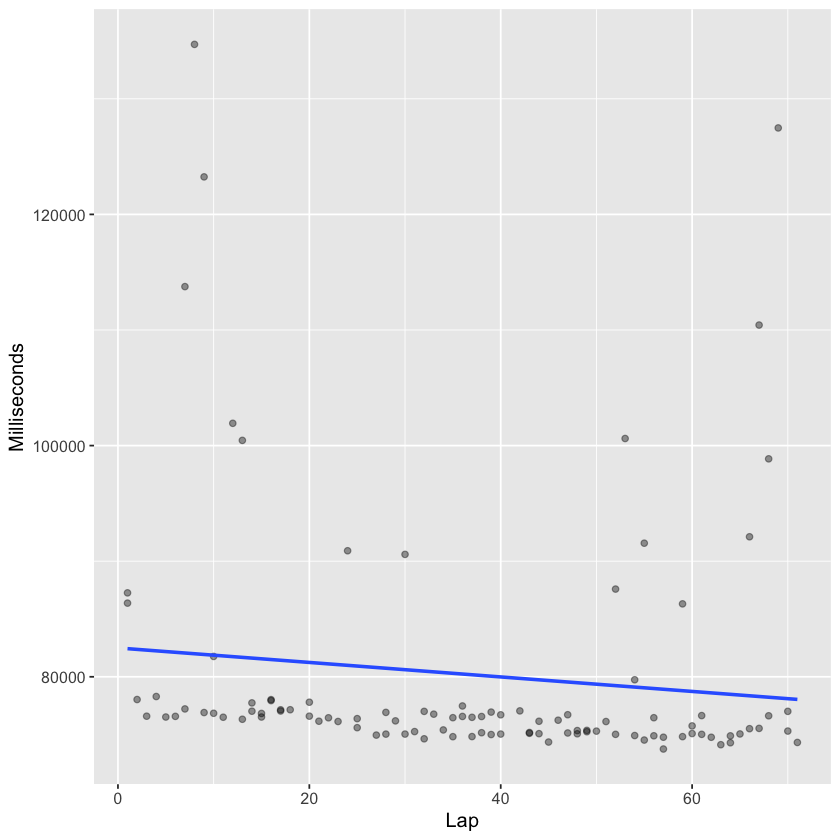

In [25]:
set.seed(2022)

#21.  Brazil

gr_brazil <- rus_laps %>%
                filter(raceId %in% brazil_race_ID) 

gr_brazil_clean <- gr_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

gr_brazil_clean_ID <- gr_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

gr_brazil_races <- rus_laps %>%
                    filter(raceId %in% gr_brazil_clean_ID)

formulaone_split <- initial_split(gr_brazil_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()


round_n <- 21

initiate_rmse() 

### GETS PREDICTION

get_brazil_prediction()

raceId,n
<dbl>,<int>
1030,54
1047,54


`geom_smooth()` using formula 'y ~ x'



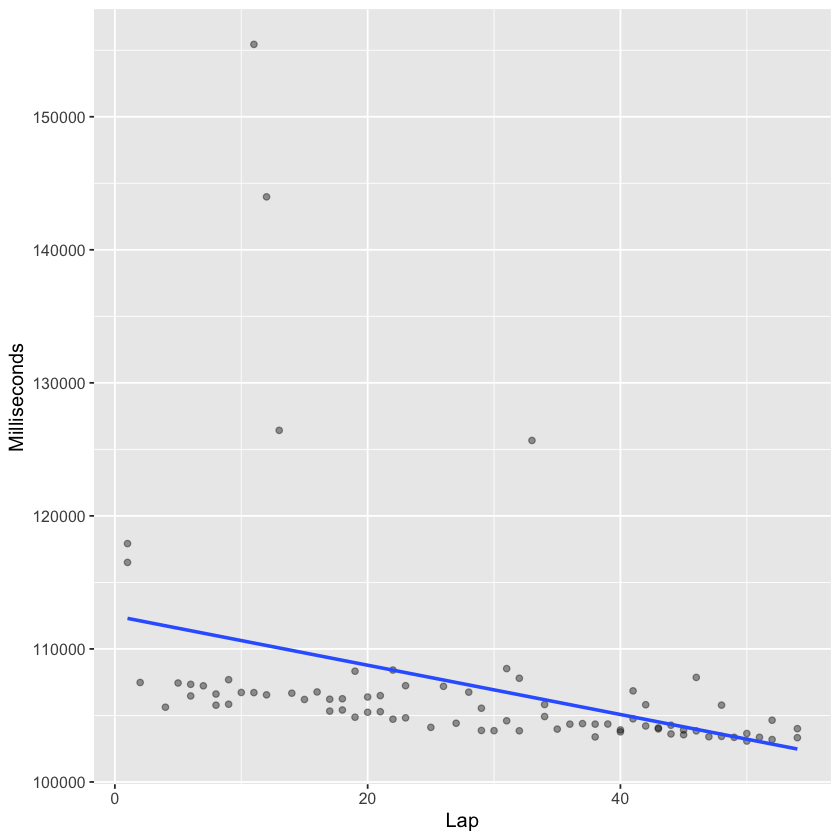

In [26]:
set.seed(2022)

#22.  Abu Dhabi

gr_uae <- rus_laps %>%
                filter(raceId %in% uae_race_ID) 

gr_uae_clean <- gr_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
gr_uae_clean
gr_uae_clean_ID <- gr_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

gr_uae_races <- rus_laps %>%
                    filter(raceId %in% gr_uae_clean_ID)

formulaone_split <- initial_split(gr_uae_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 22

initiate_rmse() 

### GETS PREDICTION

get_uae_prediction()

## Collection

In [27]:
rmse_col
racetime_col

gr_merge <- merge(rmse_col, racetime_col)

gr_merge

write_csv(gr_merge, "final_race_data/gr_race.csv")

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>
rmse,standard,9783.270,1
rmse,standard,3793.237,2
rmse,standard,5817.906,3
rmse,standard,15360.116,4
rmse,standard,8254.049,5
rmse,standard,10362.333,6
rmse,standard,6228.063,7
rmse,standard,15986.947,8
rmse,standard,1482.090,9


race_time_milliseconds,race_time_mins,race_time_hrs,Round
<dbl>,<dbl>,<dbl>,<dbl>
5914104,98.56841,1.642807,1
5709757,95.16262,1.586044,2
5329073,88.81789,1.480298,3
5389353,89.82255,1.497042,4
5858374,97.63957,1.627326,5
5757134,95.95223,1.599204,6
6169226,102.82043,1.713674,7
5871229,97.85382,1.630897,8
5557072,92.61787,1.543631,9


Round,.metric,.estimator,.estimate,race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,rmse,standard,9783.270,5914104,98.56841,1.642807
2,rmse,standard,3793.237,5709757,95.16262,1.586044
3,rmse,standard,5817.906,5329073,88.81789,1.480298
4,rmse,standard,15360.116,5389353,89.82255,1.497042
5,rmse,standard,8254.049,5858374,97.63957,1.627326
6,rmse,standard,10362.333,5757134,95.95223,1.599204
7,rmse,standard,6228.063,6169226,102.82043,1.713674
8,rmse,standard,15986.947,5871229,97.85382,1.630897
9,rmse,standard,1482.090,5557072,92.61787,1.543631
